# Setup

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"marcusnagy","key":"93576e607da3a24e7d9b57344ac004f2"}'}

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download centralesupelec-summer-school-on-ai-2022

centralesupelec-summer-school-on-ai-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip centralesupelec-summer-school-on-ai-2022.zip

Archive:  centralesupelec-summer-school-on-ai-2022.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: skeleton_code.py        
  inflating: test.csv/test.csv       
  inflating: train.csv/train.csv     


# Overview of the data

* Look att the dataframe for the data.
* Extract the max values for the columns with large values (for normalisation)
* Extract the label column with `.pop` on the dataframe

In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv("train.csv/train.csv")
data_test = pd.read_csv("test.csv/test.csv")

In [3]:
data_train[:10]

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1
5,5,"Sun, 13 Dec 2015 18:44:00 +0530",iiitd,ac.in,5,0,multipart/alternative,2,14,1,0,78.0,8365,3
6,6,"Wed, 9 Sep 2015 06:18:29 +0000 (UTC)",piazza,com,0,0,multipart/alternative,0,11,1,1,31.0,3357,1
7,7,"Wed, 23 Aug 2017 10:29:45 +0000",in,ibm.com,0,0,multipart/related,0,4,1,1,218.0,15862,1
8,8,"Sat, 19 May 2018 13:56:53 +0000",redwolf,in,0,0,multipart/alternative,14,39,0,0,49.0,8011,1
9,9,"Mon, 14 May 2018 01:41:53 +0000",m,mail.coursera.org,0,0,multipart/alternative,25,131,0,1,18.0,92248,1


In [4]:
data_train["date"][:10]

0           Mon, 6 Nov 2017 11:13:45 +0100
1          Wed, 14 Feb 2018 11:00:16 -0000
2           Wed, 6 Jul 2016 19:53:37 +0000
3          Fri, 11 Oct 2019 11:25:40 +0200
4    Tue, 07 Nov 2017 11:07:18 +0000 (UTC)
5          Sun, 13 Dec 2015 18:44:00 +0530
6     Wed, 9 Sep 2015 06:18:29 +0000 (UTC)
7          Wed, 23 Aug 2017 10:29:45 +0000
8          Sat, 19 May 2018 13:56:53 +0000
9          Mon, 14 May 2018 01:41:53 +0000
Name: date, dtype: object

In [5]:
data_test[:10]

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,"Wed, 1 Nov 2017 15:51:21 +0530",iiitd,ac.in,0,0,multipart/alternative,0,12,1,0,20.0,4505
1,1,"Thu, 05 Mar 2015 20:47:22 -0500",notifications,freelancer.com,0,0,multipart/alternative,7,49,1,0,49.0,32949
2,2,"Thu, 21 Apr 2016 14:53:08 +0530",iiitd,ac.in,1,0,multipart/alternative,0,0,1,0,24.0,1707
3,3,"Tue, 06 Feb 2018 12:12:08 +0000 (UTC)",udacity,com,0,0,multipart/alternative,13,50,1,0,70.0,76686
4,4,"Tue, 21 May 2019 05:56:27 -0700",google,com,0,0,text/html,18,76,1,0,38.0,22646
5,5,"Sun, 12 Aug 2018 12:08:03 +0000",quora,com,0,0,multipart/alternative,12,113,0,1,114.0,105871
6,6,"Sat, 20 Oct 2018 11:19:13 +0530",marketing,goindigo.in,0,0,multipart/alternative,9,51,1,0,43.0,42657
7,7,"Thu, 03 Jan 2019 19:00:00 -0800",mentor,com,0,0,multipart/alternative,4,14,0,0,67.0,7950
8,8,"Tue, 31 May 2016 00:04:29 -0500 (CDT)",amazon,com,0,0,multipart/alternative,8,62,1,0,49.0,38110
9,9,"Fri, 6 Nov 2015 10:57:55 +0530",iiitd,ac.in,0,0,multipart/alternative,0,9,1,0,34.0,4113


In [6]:
number_of_data_points = len(data_train)
number_of_data_points

80176

In [7]:
import numpy as np

In [8]:
np.argmax(data_train["images"])

61381

In [9]:
max_images = max(data_train["images"])

In [10]:
max_urls =  max(data_train["urls"])

In [11]:
max_chars_subject = max(data_train["chars_in_subject"])

In [12]:
max_chars_body = max(data_train["chars_in_body"])

In [13]:
max_images, max_urls, max_chars_subject, max_chars_body # Max values for some of the columns

(83481, 21540, 606.0, 74381084)

In [14]:
y_train = data_train.pop("label")

In [15]:
y_train

0        2
1        1
2        1
3        1
4        1
        ..
80171    3
80172    0
80173    0
80174    0
80175    0
Name: label, Length: 80176, dtype: int64

In [16]:
# NOTE: Because we know that 

# ccs         - number of emails cced with this email, e.g. 0, 2, and 10.
# bcced       - is the receiver bcc'd in the email. Can take two values
#               0 or 1.
# salutations - is salutation used in the email? Either 0 or 1.
# designation - is designation of the sender mentioned in the email. Either 0 
#               or 1.

# We might not have to normilse the data, lets have look.

In [17]:
max_ccs = max(data_train['ccs'])
max_bcc = max(data_train['bcced'])
max_salutations = max(data_train['salutations'])
max_designation = max(data_train['designation'])

print(f"Max value CCS: {max_ccs}")
print(f"Max value BCC: {max_bcc}")
print(f"Max value SALUTATIONS: {max_salutations}")
print(f"Max value DESIGNATION: {max_designation}")

Max value CCS: 179
Max value BCC: 1
Max value SALUTATIONS: 1
Max value DESIGNATION: 1


In [18]:
# Having a look on the data we can see that normilising the CCS is also 
# valuable to us

# Have a look at the example code

In [19]:
!cat skeleton_code.py

"""
This script can be used as skelton code to read the challenge train and test
csvs, to train a trivial model, and write data to the submission file.
"""
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

## Read csvs

train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

## Filtering column "mail_type"
train_x = train_df[['mail_type']]
train_x = train_x.fillna(value='None')
train_y = train_df[['label']]

test_x = test_df[['mail_type']]
test_x = test_x.fillna(value='None')

## Do one hot encoding of categorical feature
feat_enc = OneHotEncoder()
feat_enc.fit(np.vstack([train_x, test_x]))
train_x_featurized = feat_enc.transform(train_x)
test_x_featurized = feat_enc.transform(test_x)

## Train a simple KNN classifier using featurized data
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x_featurized, t

# Start changing the columns and normalize them
Check the number of unique values of the columns using `set()` and `len()`

* Columns to normelise:
  * images
  * urls
  * chars_in_subject
  * chars_in_body
  * ccs
* Columns to encode:
  * date
  * mail_type
  * tld
  * org

  To encode we can use `!pip install category_encoders`, check [documentation](https://contrib.scikit-learn.org/category_encoders/).

In [20]:
# df['name'] = df['name'].map(lambda name: name.upper()) ---- This is how we change a column

In [21]:
from typing import List

def dataframe_colum_modifier(df: pd.DataFrame,
                             column_names: List[str],
                             functions: List) -> pd.DataFrame:
  """Modify list of columns in a DataFrame applying the matching index function
  from list of functions.

  :param df: Pandas DataFrame to modify on.
  :param column_names: List of column names to do the modifications to.
  :param functions: List of functions to apply to the respective column.
  """
  df = df.copy()
  for idx, column_name in enumerate(column_names):
    df[column_name] = df[column_name].map(functions[idx])
  return df

In [22]:
normalized_data_train = dataframe_colum_modifier(df=data_train,
                                                 column_names=["images", 
                                                                "urls",
                                                                "chars_in_subject",
                                                                "chars_in_body",
                                                                "ccs"],
                                                 functions=[lambda x: x / max_images,
                                                            lambda x: x / max_urls,
                                                            lambda x: x / max_chars_subject,
                                                            lambda x: x / max_chars_body,
                                                            lambda x: x / max_ccs])

In [23]:
normalized_data_train

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0.000000,0,multipart/alternative,0.000419,0.005571,0,0,0.080858,0.001076
1,1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0.000000,0,multipart/alternative,0.000012,0.000325,0,0,0.176568,0.000040
2,2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0.000000,0,text/html,0.000048,0.000789,0,0,0.057756,0.000338
3,3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0.000000,0,multipart/mixed,0.000000,0.000000,0,0,0.024752,0.008541
4,4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,0.005587,0,multipart/alternative,0.000024,0.000511,0,0,0.080858,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80171,80171,"Tue, 30 Jun 2020 05:55:20 -0700",github,com,0.005587,0,multipart/alternative,0.000000,0.000371,0,0,0.150165,0.000018
80172,80172,"Fri, 1 May 2015 11:48:55 +0530 (IST)",NaN,NaN,0.000000,0,text/html,0.000000,0.000093,1,0,0.120462,0.000181
80173,80173,"Tue, 26 May 2020 08:18:43 -0700",google,com,0.000000,0,multipart/alternative,0.000323,0.003946,0,0,0.075908,0.000383
80174,80174,"Fri, 14 Dec 2018 09:01:13 +0000 (UTC)",medium,com,0.000000,0,multipart/alternative,0.000383,0.011096,1,1,0.278878,0.001415


In [24]:
unique_orgs, unique_tlds, unique_mail_type, unique_dates = (normalized_data_train["org"].nunique(),
                                                            normalized_data_train["tld"].nunique(),
                                                            normalized_data_train["mail_type"].nunique(),
                                                            normalized_data_train["date"].nunique())
unique_orgs, unique_tlds, unique_mail_type, unique_dates

(1038, 291, 13, 47279)

In [25]:
# We can tell that we most likely want to avoid using one-hot encoding on most
# most of these fields.
# For 'Date' we could probably do something like 1 if mail was sent during
# normal working hours, e.g. 5AM - 10PM and everything between 10PM and 5AM is
# marked with 0.

In [26]:
!pip install category_encoders

In [27]:
import category_encoders as ce # Import different encoders

# Trying Support Vector Machine (SLOW)

In [28]:
tot = data_train.append(data_test)
tot[100000:100001]

/var/folders/k9/vrcqwzfd1n9g27brpc37h9000000gn/T/ipykernel_46557/1219487660.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tot = data_train.append(data_test)


,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
19824,19824,"Sat, 27 May 2017 17:07:30 +0000 (UTC)",linkedin,com,0,0,multipart/alternative,4,26,0,0,29.0,22718


In [704]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Encoder
#encoder = ce.BackwardDifferenceEncoder(drop_invariant= True) # Somewhat good.
#encoder = ce.HelmertEncoder(drop_invariant=True) # Better.
#encoder = ce.OrdinalEncoder(drop_invariant=True) # Doesn't work
#encoder = ce.HashingEncoder(drop_invariant=True) # Bad
encoder = ce.TargetEncoder(drop_invariant=True) # CAN BE GOOD WITH LSGB for many iterations
encoder = ce.JamesSteinEncoder(drop_invariant=True, randomized=True, sigma=0.2)
#encoder = ce.CatBoostEncoder(drop_invariant=True, sigma=0.5) # Works pretty good

# Data
train_data = pd.read_csv('train.csv/train.csv')
test_data = pd.read_csv('test.csv/test.csv')
tot_data = pd.concat([train_data,test_data]).drop('Unnamed: 0', axis=1).drop('date', axis=1)
tot_labels = tot_data.pop('label')
train_labels = train_data.pop('label')
train_data_modified = train_data.drop('Unnamed: 0', axis=1).drop('date', axis=1)
len(train_labels), len(tot_labels), len(tot_data)
tot_data[:10]

/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027
1,edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961
2,usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149
3,granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296
4,github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355
5,iiitd,ac.in,5,0,multipart/alternative,2,14,1,0,78.0,8365
6,piazza,com,0,0,multipart/alternative,0,11,1,1,31.0,3357
7,in,ibm.com,0,0,multipart/related,0,4,1,1,218.0,15862
8,redwolf,in,0,0,multipart/alternative,14,39,0,0,49.0,8011
9,m,mail.coursera.org,0,0,multipart/alternative,25,131,0,1,18.0,92248


In [705]:
# Random permutation
perm = np.random.permutation(len(tot_data))
X = tot_data.iloc[perm].reset_index(drop=True)
y = tot_labels.iloc[perm].reset_index(drop=True)
X[:10]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,spotify,com,0,0,multipart/alternative,2,29,1,0,20.0,33925
1,coursera,org,0,0,multipart/alternative,33,151,0,0,27.0,100086
2,bigbasket,in,0,0,text/html,18,38,0,0,39.0,7379
3,topresume,com,0,0,multipart/alternative,1,11,1,0,26.0,6551
4,iiitd,ac.in,6,0,multipart/alternative,1,1,1,0,157.0,15170
5,amazon,in,0,0,multipart/alternative,26,170,1,0,36.0,76561
6,repositoryhosting,com,0,0,multipart/alternative,0,7,0,0,29.0,30675
7,medium,com,0,0,multipart/alternative,15,161,1,1,153.0,72272
8,glassdoor,com,0,0,multipart/alternative,21,77,0,1,51.0,78459
9,iiitd,ac.in,1,0,multipart/alternative,1,4,1,0,49.0,5262


In [706]:


# encode_result = encoder.fit_transform(tot_data.reset_index().drop('index', axis=1), tot_labels.reset_index().drop('index', axis=1))
encode_result = encoder.fit_transform(X, y)
encode_result[:30]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0.230401,1.908795,0,0,1.962063,2,29,1,0,20.0,33925
1,0.501278,0.731313,0,0,1.781789,33,151,0,0,27.0,100086
2,1.394624,0.683269,0,0,0.906311,18,38,0,0,39.0,7379
3,0.585033,2.057055,0,0,1.803765,1,11,1,0,26.0,6551
4,1.864640,1.535052,6,0,1.166323,1,1,1,0,157.0,15170
5,1.846941,1.673689,0,0,1.871735,26,170,1,0,36.0,76561
6,0.512773,1.623372,0,0,1.752940,0,7,0,0,29.0,30675
7,0.561242,1.581445,0,0,1.238538,15,161,1,1,153.0,72272
8,1.083223,1.443743,0,0,1.697444,21,77,0,1,51.0,78459
9,1.490735,1.367385,1,0,1.314439,1,4,1,0,49.0,5262


In [707]:
df = encoder.transform(train_data_modified)
df[:10]
df.columns[:22], encoder.feature_names

(Index(['org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
        'salutations', 'designation', 'chars_in_subject', 'chars_in_body'],
       dtype='object'),
 ['org',
  'tld',
  'ccs',
  'bcced',
  'mail_type',
  'images',
  'urls',
  'salutations',
  'designation',
  'chars_in_subject',
  'chars_in_body'])

In [708]:
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

columns_to_norm = ['images', 'urls', 'chars_in_subject', 'chars_in_body', 'ccs']

#
# Normalize the feature columns
#
df[columns_to_norm] = df[columns_to_norm].apply(normalize)

df[:10]


,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,1.448422,1.463274,0.000000,0,1.640206,0.000419,0.005571,0,0,0.080858,0.001076
1,0.673282,0.666217,0.000000,0,1.640206,0.000012,0.000325,0,0,0.176568,0.000040
2,0.695918,1.594165,0.000000,0,1.029407,0.000048,0.000789,0,0,0.057756,0.000338
3,1.474256,1.376895,0.000000,0,1.548000,0.000000,0.000000,0,0,0.024752,0.008541
4,1.887488,1.594165,0.005587,0,1.640206,0.000024,0.000511,0,0,0.080858,0.000032
5,1.789870,1.786617,0.027933,0,1.640206,0.000024,0.000650,1,0,0.128713,0.000112
6,0.505022,1.594165,0.000000,0,1.640206,0.000000,0.000511,1,1,0.051155,0.000045
7,0.946819,0.901107,0.000000,0,1.646017,0.000000,0.000186,1,1,0.359736,0.000213
8,1.504632,1.421475,0.000000,0,1.640206,0.000168,0.001811,0,0,0.080858,0.000108
9,1.049098,1.034175,0.000000,0,1.640206,0.000299,0.006082,0,1,0.029703,0.001240


In [709]:
# from sklearn.decomposition import PCA
# scaler = StandardScaler()
# # pca = PCA(n_components=9)
# # X = pca.fit_transform(encode_result)
# X = scaler.fit_transform(encode_result, train_labels)
# X

In [710]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,
                                                    train_labels,
                                                    train_size=0.7,
                                                    shuffle=True)

In [711]:
x_train

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
30682,1.544841,1.546063,0.000000,0,1.640206,0.000323,0.004875,0,0,0.044554,0.001892
29024,0.960504,1.594165,0.000000,0,1.640206,0.000287,0.002321,1,0,0.181518,0.001127
26531,0.921609,1.421475,0.000000,0,1.640206,0.000000,0.000325,1,0,0.031353,0.000164
56075,0.988202,0.964682,0.000000,0,1.548000,0.000000,0.000371,1,0,0.112211,0.126225
21161,0.695918,1.594165,0.000000,0,1.640206,0.000048,0.000882,0,0,0.061056,0.000363
...,...,...,...,...,...,...,...,...,...,...,...
34666,0.954213,0.953356,0.000000,0,1.035373,0.000000,0.000000,0,0,0.094059,0.000007
76506,1.912263,2.185365,0.000000,0,1.548000,0.000000,0.000000,0,0,0.026403,0.000000
27018,1.146305,1.244374,0.000000,0,1.029407,0.000108,0.001253,0,0,0.037954,0.000271
77343,1.789870,1.786617,0.044693,0,1.640206,0.000000,0.000000,1,0,0.094059,0.000074


In [712]:
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier

#clf = svm.SVC(kernel='rbf', C=0.8)
# clf = HistGradientBoostingClassifier(loss='log_loss',
#                                      learning_rate=0.01,
#                                      max_iter=2000,
#                                     #  categorical_features=[True, True, False, False, True, False, False, False, False, False, False],
#                                      verbose=1)

clf = LGBMClassifier(objective='multiclass',
                     num_iterations=10000,
                     learning_rate=0.001,
                     verbosity=1,
                     num_class=8, 
                     metric='multi_logloss',
                     extra_trees=True, 
                     path_smooth=0.8, 
                     max_bin=300, 
                     zero_as_missing=True,
                     boosting='gbdt')

clf.fit(x_train.to_numpy(), y_train.to_numpy())

/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1391
[LightGBM] [Info] Number of data points in the train set: 56123, number of used features: 11
[LightGBM] [Info] Start training from score -1.493531
[LightGBM] [Info] Start training from score -0.770835
[LightGBM] [Info] Start training from score -2.228811
[LightGBM] [Info] Start training from score -2.009714
[LightGBM] [Info] Start training from score -5.405872
[LightGBM] [Info] Start training from score -6.492650
[LightGBM] [Info] Start training from score -6.253170
[LightGBM] [Info] Start training from score -2.761

In [701]:
y_pred = clf.predict(x_test)

In [702]:
y_pred[:10], y_test.to_numpy()[:10]

(array([1, 4, 0, 3, 3, 1, 0, 2, 1, 1]), array([2, 4, 2, 3, 1, 2, 0, 2, 1, 2]))

In [703]:
from sklearn.metrics import f1_score

f1_score(y_test.to_numpy(), y_pred, average='weighted')

0.5869230242111758

In [601]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

In [602]:
confusion_matrix(y_test, y_pred)

array([[2962, 2132,  182,   10,   39,   19,   12,   40],
       [1589, 6184, 1117, 1292,   33,   15,    5,  905],
       [ 153,  952, 1436,    1,    0,    0,    7,   21],
       [   4,  957,    7, 2254,    0,    0,    0,    1],
       [   9,   52,   15,    1,   28,    0,    0,    0],
       [   9,   21,    3,    2,    0,   13,    0,    0],
       [   5,   15,   17,    0,    0,    0,   12,    3],
       [   0,  204,    2,    0,    0,    0,    1, 1312]])

In [603]:
test_data_submit = pd.read_csv('test.csv/test.csv').drop('Unnamed: 0', axis=1).drop('date', axis=1)

In [604]:
test_data_submit[:5]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,iiitd,ac.in,0,0,multipart/alternative,0,12,1,0,20.0,4505
1,notifications,freelancer.com,0,0,multipart/alternative,7,49,1,0,49.0,32949
2,iiitd,ac.in,1,0,multipart/alternative,0,0,1,0,24.0,1707
3,udacity,com,0,0,multipart/alternative,13,50,1,0,70.0,76686
4,google,com,0,0,text/html,18,76,1,0,38.0,22646


In [605]:
def norm_comp(df: pd.DataFrame, cols: List[str]):
    """normalize the Pandas DataFrame columns.
    
    :param df: Pandas DataFrame.
    :param cols: List of string of column names.
    """
    def normalize(values):
        return (values - values.min())/(values.max() - values.min())
    #
    # Normalize the feature columns
    #
    df[cols] = df[cols].apply(normalize)
        

columns_to_norm = ['images', 'urls', 'chars_in_subject', 'chars_in_body', 'ccs']



In [606]:
tf_test_data_submit = encoder.transform(test_data_submit)
tf_test_data_submit[:5]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,1.789870,1.786617,0,0,1.640206,0,12,1,0,20.0,4505
1,1.461646,0.574436,0,0,1.640206,7,49,1,0,49.0,32949
2,1.789870,1.786617,1,0,1.640206,0,0,1,0,24.0,1707
3,1.447631,1.594165,0,0,1.640206,13,50,1,0,70.0,76686
4,0.346485,1.594165,0,0,1.029407,18,76,1,0,38.0,22646


In [607]:
norm_comp(df=tf_test_data_submit,
          cols=columns_to_norm)
tf_test_data_submit[:5]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,1.789870,1.786617,0.000000,0,1.640206,0.000000,0.000557,1,0,0.033003,0.000061
1,1.461646,0.574436,0.000000,0,1.640206,0.000084,0.002275,1,0,0.080858,0.000447
2,1.789870,1.786617,0.005587,0,1.640206,0.000000,0.000000,1,0,0.039604,0.000023
3,1.447631,1.594165,0.000000,0,1.640206,0.000156,0.002321,1,0,0.115512,0.001040
4,0.346485,1.594165,0.000000,0,1.029407,0.000216,0.003528,1,0,0.062706,0.000307


In [608]:
pred_y = clf.predict(tf_test_data_submit)

In [609]:
pred_y[:5]

array([1, 0, 3, 2, 0])

In [610]:
## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['label'])
pred_df.to_csv("hgbc_sample_submission.csv", index=True, index_label='Id')

In [314]:
encoder.get_feature_names()

['date',
 'org',
 'tld',
 'ccs',
 'bcced',
 'mail_type',
 'images',
 'urls',
 'salutations',
 'designation',
 'chars_in_subject',
 'chars_in_body']

# Attempt using CatBoost to classify and encoding the entire data set. Aka using Decision Tree.

**To install:**

 `pip install catboost`

**Install visualization tools:**

**Install the ipywidgetsPython package (version 7.x or higher is required):**

`pip install ipywidgets`

**Turn on the widgets extension:**

`jupyter nbextension enable --py widgetsnbextension`
 

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 84 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
train_data = pd.read_csv("train.csv/train.csv")
train_data

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80171,80171,"Tue, 30 Jun 2020 05:55:20 -0700",github,com,1,0,multipart/alternative,0,8,0,0,91.0,1307,3
80172,80172,"Fri, 1 May 2015 11:48:55 +0530 (IST)",NaN,NaN,0,0,text/html,0,2,1,0,73.0,13464,0
80173,80173,"Tue, 26 May 2020 08:18:43 -0700",google,com,0,0,multipart/alternative,27,85,0,0,46.0,28485,0
80174,80174,"Fri, 14 Dec 2018 09:01:13 +0000 (UTC)",medium,com,0,0,multipart/alternative,32,239,1,1,169.0,105276,0


In [ ]:
train_labels = train_data.pop('label')
train_labels[:10]

0    2
1    1
2    1
3    1
4    1
5    3
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [ ]:
train_data = train_data.drop('date', axis=1).drop("Unnamed: 0", axis=1)
train_data

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027
1,edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961
2,usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149
3,granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296
4,github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355
...,...,...,...,...,...,...,...,...,...,...,...
80171,github,com,1,0,multipart/alternative,0,8,0,0,91.0,1307
80172,NaN,NaN,0,0,text/html,0,2,1,0,73.0,13464
80173,google,com,0,0,multipart/alternative,27,85,0,0,46.0,28485
80174,medium,com,0,0,multipart/alternative,32,239,1,1,169.0,105276


In [ ]:
cat_encoder = ce.CatBoostEncoder(handle_missing='value')

cat_encoder.fit(train_data, train_labels)

CatBoostEncoder(cols=['org', 'tld', 'mail_type'])

In [ ]:
train_cat = cat_encoder.fit_transform(train_data, train_labels)

In [ ]:
train_cat[:25]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,1.557187,1.557187,0,0,1.557187,35,120,0,0,49.0,80027
1,1.557187,1.557187,0,0,1.778593,1,7,0,0,107.0,2961
2,1.557187,1.557187,0,0,1.557187,4,17,0,0,35.0,25149
3,1.557187,1.557187,0,0,1.557187,0,0,0,0,15.0,635296
4,1.557187,1.278593,1,0,1.519062,2,11,0,0,49.0,2355
5,1.557187,1.557187,5,0,1.389297,2,14,1,0,78.0,8365
6,1.557187,1.185729,0,0,1.711437,0,11,1,1,31.0,3357
7,1.557187,1.557187,0,0,1.557187,0,4,1,1,218.0,15862
8,1.557187,1.557187,0,0,1.592864,14,39,0,0,49.0,8011
9,1.557187,1.557187,0,0,1.508170,25,131,0,1,18.0,92248


In [ ]:
data_train[:25]

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027
1,1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961
2,2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149
3,3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296
4,4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355
5,5,"Sun, 13 Dec 2015 18:44:00 +0530",iiitd,ac.in,5,0,multipart/alternative,2,14,1,0,78.0,8365
6,6,"Wed, 9 Sep 2015 06:18:29 +0000 (UTC)",piazza,com,0,0,multipart/alternative,0,11,1,1,31.0,3357
7,7,"Wed, 23 Aug 2017 10:29:45 +0000",in,ibm.com,0,0,multipart/related,0,4,1,1,218.0,15862
8,8,"Sat, 19 May 2018 13:56:53 +0000",redwolf,in,0,0,multipart/alternative,14,39,0,0,49.0,8011
9,9,"Mon, 14 May 2018 01:41:53 +0000",m,mail.coursera.org,0,0,multipart/alternative,25,131,0,1,18.0,92248


In [ ]:
train_labels

0        2
1        1
2        1
3        1
4        1
        ..
80171    3
80172    0
80173    0
80174    0
80175    0
Name: label, Length: 80176, dtype: int64

In [ ]:
normalized_train_cat = dataframe_colum_modifier(df=train_cat,
                                                column_names=["images", 
                                                              "urls",
                                                              "chars_in_subject",
                                                              "chars_in_body",
                                                              "ccs"],
                                                functions=[lambda x: x / max_images,
                                                           lambda x: x / max_urls,
                                                           lambda x: x / max_chars_subject,
                                                           lambda x: x / max_chars_body,
                                                           lambda x: x / max_ccs])

In [ ]:
normalized_train_cat

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,1.557187,1.557187,0.000000,0,1.557187,0.000419,0.005571,0,0,0.080858,0.001076
1,1.557187,1.557187,0.000000,0,1.778593,0.000012,0.000325,0,0,0.176568,0.000040
2,1.557187,1.557187,0.000000,0,1.557187,0.000048,0.000789,0,0,0.057756,0.000338
3,1.557187,1.557187,0.000000,0,1.557187,0.000000,0.000000,0,0,0.024752,0.008541
4,1.557187,1.278593,0.005587,0,1.519062,0.000024,0.000511,0,0,0.080858,0.000032
...,...,...,...,...,...,...,...,...,...,...,...
80171,2.062238,1.654059,0.005587,0,1.711025,0.000000,0.000371,0,0,0.150165,0.000018
80172,0.768567,0.768701,0.000000,0,0.860579,0.000000,0.000093,1,0,0.120462,0.000181
80173,0.254642,1.654098,0.000000,0,1.711047,0.000323,0.003946,0,0,0.075908,0.000383
80174,0.582029,1.654050,0.000000,0,1.711018,0.000383,0.011096,1,1,0.278878,0.001415


In [ ]:
test_data = pd.read_csv("test.csv/test.csv")
test_data

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,"Wed, 1 Nov 2017 15:51:21 +0530",iiitd,ac.in,0,0,multipart/alternative,0,12,1,0,20.0,4505
1,1,"Thu, 05 Mar 2015 20:47:22 -0500",notifications,freelancer.com,0,0,multipart/alternative,7,49,1,0,49.0,32949
2,2,"Thu, 21 Apr 2016 14:53:08 +0530",iiitd,ac.in,1,0,multipart/alternative,0,0,1,0,24.0,1707
3,3,"Tue, 06 Feb 2018 12:12:08 +0000 (UTC)",udacity,com,0,0,multipart/alternative,13,50,1,0,70.0,76686
4,4,"Tue, 21 May 2019 05:56:27 -0700",google,com,0,0,text/html,18,76,1,0,38.0,22646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34360,34360,"Mon, 19 Sep 2016 19:46:53 -0700 (PDT)",quora,com,0,0,multipart/alternative,8,110,1,1,134.0,89070
34361,34361,"Fri, 19 Aug 2016 06:05:47 -0000",shop,sdconnect.in,0,0,multipart/alternative,23,117,1,0,52.0,24241
34362,34362,"Wed, 4 May 2016 17:06:24 +0530",iiitd,ac.in,0,0,multipart/alternative,1,4,1,0,35.0,4558
34363,34363,"Mon, 29 Dec 2014 14:35:52 +0530",tatadocomo,com,0,0,multipart/alternative,0,6,1,0,38.0,2591


In [ ]:
sample_sub = pd.read_csv("sample_submission.csv")
sample_sub

,Unnamed: 0,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
34360,34360,0
34361,34361,0
34362,34362,0
34363,34363,0


In [ ]:
# split the data in to train and test so we can evaluate our model locally

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_train_cat,
                                                    train_labels,
                                                    train_size=0.7,
                                                    shuffle=True)

In [ ]:
x_train[:10], y_train[:10]

(            org       tld       ccs  bcced  mail_type    images      urls  \
 56752  2.077817  1.650827  0.000000      0   0.890727  0.000000  0.000046   
 71090  1.130920  1.653741  0.000000      0   0.860020  0.000144  0.001253   
 74774  0.771202  0.771344  0.000000      0   0.859654  0.000000  0.000696   
 31184  4.544317  1.663560  0.000000      0   1.717931  0.000455  0.009935   
 1189   1.764186  1.758879  0.000000      0   1.617645  0.000000  0.000836   
 63321  1.352772  1.375988  0.000000      0   1.714616  0.000359  0.003760   
 67516  1.871469  1.866704  0.005587      0   1.711707  0.000000  0.001021   
 9202   1.371243  1.373179  0.000000      0   1.560052  0.000000  0.000000   
 8177   0.926198  1.641009  0.000000      0   1.706015  0.000108  0.001207   
 32487  1.879766  0.705088  0.000000      0   1.718799  0.000264  0.003110   
 
        salutations  designation  chars_in_subject  chars_in_body  
 56752            0            0          0.100660   4.611387e-06  
 710

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=5000,
                           loss_function='MultiClass',
                           depth=4,
                           eval_metric = 'MultiClass',
                           learning_rate=0.001,
                           od_type='IncToDec',
                           od_pval=0.05,
                           l2_leaf_reg=3.0,
                           random_strength=1
                           )

model.fit(x_train, y_train)



0:	learn: 2.0769704	total: 89.7ms	remaining: 7m 28s
1:	learn: 2.0745618	total: 129ms	remaining: 5m 22s
2:	learn: 2.0721149	total: 166ms	remaining: 4m 36s
3:	learn: 2.0697345	total: 207ms	remaining: 4m 18s
4:	learn: 2.0673675	total: 244ms	remaining: 4m 3s
5:	learn: 2.0649675	total: 281ms	remaining: 3m 54s
6:	learn: 2.0625624	total: 322ms	remaining: 3m 49s
7:	learn: 2.0601863	total: 366ms	remaining: 3m 48s
8:	learn: 2.0578215	total: 401ms	remaining: 3m 42s
9:	learn: 2.0554379	total: 437ms	remaining: 3m 37s
10:	learn: 2.0530744	total: 473ms	remaining: 3m 34s
11:	learn: 2.0507216	total: 509ms	remaining: 3m 31s
12:	learn: 2.0483753	total: 547ms	remaining: 3m 29s
13:	learn: 2.0460322	total: 585ms	remaining: 3m 28s
14:	learn: 2.0437359	total: 624ms	remaining: 3m 27s
15:	learn: 2.0414318	total: 663ms	remaining: 3m 26s
16:	learn: 2.0391304	total: 701ms	remaining: 3m 25s
17:	learn: 2.0368005	total: 737ms	remaining: 3m 24s
18:	learn: 2.0345244	total: 780ms	remaining: 3m 24s
19:	learn: 2.0322309	t

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[:10], y_test[:10]

(array([[1],
        [7],
        [1],
        [3],
        [1],
        [1],
        [1],
        [3],
        [0],
        [1]]), 10849    1
 3881     1
 20800    3
 15683    3
 24140    3
 64599    1
 47597    1
 53389    3
 22855    0
 6945     3
 Name: label, dtype: int64)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test.to_numpy(), y_pred, average='weighted')

0.5567302773736491

# DecisionTreeClassifier attempt


In [ ]:
train_data = pd.read_csv("train.csv/train.csv").drop("date", axis=1).drop("Unnamed: 0", axis=1).dropna()

In [ ]:
train_labels = train_data.pop("label")

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
train_data['org'].to_numpy()

array(['reply', 'edm', 'usebackpack', ..., 'github', 'google', 'medium'],
      dtype=object)

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
encoder.fit(train_data, train_labels)

OrdinalEncoder()

In [ ]:
encoded_input = encoder.fit_transform(train_data, train_labels)

In [ ]:
encoded_input[:10], len(encoded_input[0])

(array([[7.6200e+02, 8.2000e+01, 0.0000e+00, 0.0000e+00, 3.0000e+00,
         3.5000e+01, 1.2000e+02, 0.0000e+00, 0.0000e+00, 4.9000e+01,
         2.4671e+04],
        [2.9800e+02, 8.6000e+01, 0.0000e+00, 0.0000e+00, 3.0000e+00,
         1.0000e+00, 7.0000e+00, 0.0000e+00, 0.0000e+00, 1.0700e+02,
         2.4500e+03],
        [9.4600e+02, 6.6000e+01, 0.0000e+00, 0.0000e+00, 8.0000e+00,
         4.0000e+00, 1.7000e+01, 0.0000e+00, 0.0000e+00, 3.5000e+01,
         1.3705e+04],
        [4.1400e+02, 1.6000e+01, 0.0000e+00, 0.0000e+00, 4.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5000e+01,
         2.9862e+04],
        [3.9500e+02, 6.6000e+01, 1.0000e+00, 0.0000e+00, 3.0000e+00,
         2.0000e+00, 1.1000e+01, 0.0000e+00, 0.0000e+00, 4.9000e+01,
         1.9530e+03],
        [4.5900e+02, 8.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00,
         2.0000e+00, 1.4000e+01, 1.0000e+00, 0.0000e+00, 7.8000e+01,
         6.3120e+03],
        [7.0100e+02, 6.6000e+01, 0.0000e

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(encoded_input, train_labels, shuffle=True, train_size=0.7)

In [ ]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test.to_numpy(), y_pred, average='weighted')

0.43022858975342676

# Neural Network attempt

In [614]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Encoder
encoder = ce.OrdinalEncoder()

# Data
train_data = pd.read_csv('train.csv/train.csv')
test_data = pd.read_csv('test.csv/test.csv')
tot_data = pd.concat([train_data,test_data]).drop('Unnamed: 0', axis=1).drop('date', axis=1)
tot_labels = tot_data.pop('label')
train_labels = train_data.pop('label')
train_data_modified = train_data.drop('Unnamed: 0', axis=1).drop('date', axis=1)
len(train_labels), len(tot_labels), len(tot_data)
tot_data[:10]


,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027
1,edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961
2,usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149
3,granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296
4,github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355
5,iiitd,ac.in,5,0,multipart/alternative,2,14,1,0,78.0,8365
6,piazza,com,0,0,multipart/alternative,0,11,1,1,31.0,3357
7,in,ibm.com,0,0,multipart/related,0,4,1,1,218.0,15862
8,redwolf,in,0,0,multipart/alternative,14,39,0,0,49.0,8011
9,m,mail.coursera.org,0,0,multipart/alternative,25,131,0,1,18.0,92248


In [615]:
eencode_result = encoder.fit_transform(tot_data.reset_index().drop('index', axis=1), tot_labels.reset_index().drop('index', axis=1))
encode_result[:30]

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,1,1,0,0,1,0,0,0,0,57.0,685
1,2,2,0,0,2,4,19,0,0,36.0,26859
2,3,2,0,0,2,0,5,1,0,17.0,8590
3,4,3,0,0,2,0,0,0,0,4.0,17103
4,5,2,0,0,2,2,16,0,0,28.0,30705
5,6,2,0,0,2,46,142,0,0,85.0,126660
6,7,2,0,0,2,10,110,1,0,126.0,105381
7,2,2,0,0,3,4,14,0,0,35.0,24761
8,8,4,0,0,2,9,121,0,0,32.0,61755
9,4,3,2,0,2,0,3,1,0,29.0,24823


In [616]:
df = encoder.transform(train_data_modified)
df[:10]
df.columns[:22], encoder.feature_names

(Index(['org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
        'salutations', 'designation', 'chars_in_subject', 'chars_in_body'],
       dtype='object'),
 ['org',
  'tld',
  'ccs',
  'bcced',
  'mail_type',
  'images',
  'urls',
  'salutations',
  'designation',
  'chars_in_subject',
  'chars_in_body'])

In [617]:
minmax = MinMaxScaler()
minmax.fit(encode_result)
df = minmax.transform(df)
df[:10]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.19257076e-04, 5.57103064e-03, 0.00000000e+00,
        0.00000000e+00, 8.08580858e-02, 1.07585155e-03],
       [9.24214418e-04, 3.28947368e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.19787736e-05, 3.24976787e-04, 0.00000000e+00,
        0.00000000e+00, 1.76567657e-01, 3.97547333e-05],
       [1.84842884e-03, 6.57894737e-03, 0.00000000e+00, 0.00000000e+00,
        7.14285714e-02, 4.79150945e-05, 7.89229341e-04, 0.00000000e+00,
        0.00000000e+00, 5.77557756e-02, 3.38056398e-04],
       [2.77264325e-03, 9.86842105e-03, 0.00000000e+00, 0.00000000e+00,
        1.42857143e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.47524752e-02, 8.54104296e-03],
       [3.69685767e-03, 6.57894737e-03, 5.58659218e-03, 0.00000000e+00,
        0.00000000e+00, 2.39575472e-05, 5.10677809e-04, 0.00000000e+00,
        0.00000000e+00, 8.08580858e-02, 3.16075002e-

In [685]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,
                                                    train_labels,
                                                    train_size=0.7,
                                                    shuffle=True)

x_train[:10], x_train.shape[1]

(array([[3.65988909e-01, 9.53947368e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 5.98938681e-05, 1.20705664e-03, 0.00000000e+00,
         0.00000000e+00, 8.25082508e-02, 3.05252357e-04],
        [4.62107209e-03, 1.31578947e-02, 5.58659218e-03, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 9.28505107e-05, 1.00000000e+00,
         0.00000000e+00, 8.41584158e-02, 1.27236657e-04],
        [1.02587800e-01, 1.38157895e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.19787736e-05, 1.25348189e-03, 1.00000000e+00,
         0.00000000e+00, 1.32013201e-01, 2.87868904e-04],
        [3.72458410e-01, 6.57894737e-03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 4.17827298e-04, 0.00000000e+00,
         0.00000000e+00, 6.76567657e-02, 2.08587990e-04],
        [1.10905730e-02, 6.57894737e-03, 0.00000000e+00, 0.00000000e+00,
         7.14285714e-02, 1.91660378e-04, 3.15691736e-03, 1.00000000e+00,
         0.00000000e+00, 6.27062706e-0

In [686]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [687]:
x_train.reshape(x_train.shape[0], 1, x_train.shape[1]).shape

(56123, 1, 11)

In [688]:
import tensorflow as tf

In [689]:


# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(128,return_sequences=True, return_state=True, input_shape=(win_length, 11)),
#     tf.keras.layers.Dense(8, activation='softmax')
# ])

LSTM_model = tf.keras.Sequential()
LSTM_model.add(tf.keras.layers.Embedding(input_dim=1000, output_dim=64))
LSTM_model.add(tf.keras.layers.LSTM(128))
LSTM_model.add(tf.keras.layers.Dense(8, activation='softmax'))

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [691]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/NGT/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_22" (type Sequential).
    
    Input 0 of layer "lstm_22" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 11)
    
    Call arguments received by layer "sequential_22" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 11), dtype=float32)
      • training=True
      • mask=None


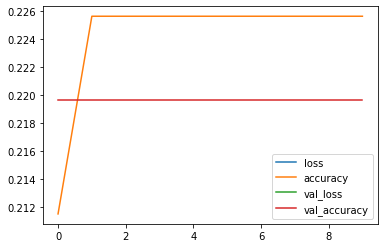

In [ ]:
pd.DataFrame(history.history).plot()

# Test SVM with different encoders depending on column

In [ ]:
train_data = pd.read_csv('train.csv/train.csv').drop('date', axis=1).drop('Unnamed: 0', axis=1)
test_data = pd.read_csv('test.csv/test.csv').drop('date', axis=1).drop('Unnamed: 0', axis=1)

In [ ]:
Y = train_data.pop('label')

In [ ]:
X = train_data

In [ ]:
X

,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027
1,edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961
2,usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149
3,granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296
4,github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355
...,...,...,...,...,...,...,...,...,...,...,...
80171,github,com,1,0,multipart/alternative,0,8,0,0,91.0,1307
80172,NaN,NaN,0,0,text/html,0,2,1,0,73.0,13464
80173,google,com,0,0,multipart/alternative,27,85,0,0,46.0,28485
80174,medium,com,0,0,multipart/alternative,32,239,1,1,169.0,105276


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encode_mail = OneHotEncoder()
Z = encode_mail.fit_transform(np.vstack([X[['mail_type']].fillna('None'),
                               test_data[['mail_type']].fillna('None')]))

In [ ]:
Z

<114541x15 sparse matrix of type '<class 'numpy.float64'>'
	with 114541 stored elements in Compressed Sparse Row format>

114541